In [1]:
%pip install tensorflow
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

#base settings

baseDir = "./datasets/FruitDataset/"
os.listdir(baseDir)

batch_size = 2
image_size = 32 # You are now locked into 32 because your weights were build with 32

In [3]:
import tensorflow as tf

# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "train",
    labels="inferred", #figure out the values
    label_mode="categorical",  # Use categorical for multi-class classification
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42            
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "dev",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Test dataset (assuming separate directory for test data)
test_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "test",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

print(train_ds.class_names)

Found 383 files belonging to 3 classes.
Found 109 files belonging to 3 classes.
Found 58 files belonging to 3 classes.
['Apple', 'Banana', 'Orange']


In [4]:
# define model layers
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(image_size, image_size, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(15, activation='softmax') # The structure stays as it was so that you can load the weights
])

/Users/ame/Library/Python/3.9/lib/python/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,783 (815.56 KB)

 Trainable params: 208,783 (815.56 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
values = [10, 20, 30, 40, 50, 60]

#slice => cutting an array
print(values[:-1])

[10, 20, 30, 40, 50]


In [15]:
# Load the complete pre-trained weights
model.load_weights('./weights/customCNN.weights.h5')

# Create a new model by copying all but the last layer
without_last = model.layers[:-1]

# 4. Rebuild the model without the last layer
model = tf.keras.Sequential(without_last)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,848 (808.00 KB)

 Trainable params: 206,848 (808.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Freeze all layers in base model
model.trainable = False

for layer in model.layers[-2:]:
    layer.trainable = True

# Add new layers on top of the base model
transfer_model = tf.keras.Sequential([
    model,
    layers.Dense(3, activation='softmax')  # New output layer for 3-class classification
])

Transfer Learning is something you do with Deep Networks. Ones with lots of layers. This is an example notebook on how transfer learning works. With shallow CNN models, transfer learning won't help you much because there aren't enough layers to work with.

In [17]:
transfer_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128)            │       206,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,235 (809.51 KB)

 Trainable params: 131,587 (514.01 KB)

 Non-trainable params: 75,648 (295.50 KB)

In [ ]:
#compile model

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
                  loss='categorical_crossentropy',  # Suitable for classification
                  metrics=['accuracy'])

In [19]:
epochs = 20
history = transfer_model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.3057 - loss: 5.5320 - val_accuracy: 0.6789 - val_loss: 1.1581
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6919 - loss: 1.0430 - val_accuracy: 0.7890 - val_loss: 0.8122
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8452 - loss: 0.5210 - val_accuracy: 0.8073 - val_loss: 0.7143
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8384 - loss: 0.4260 - val_accuracy: 0.8349 - val_loss: 0.6763
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8990 - loss: 0.2960 - val_accuracy: 0.8440 - val_loss: 0.6735
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8874 - loss: 0.2863 - val_accuracy: 0.8257 - val_loss: 0.7533
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9237 - loss: 0.2462 - val_accuracy: 0.8349 - val_loss: 0.7053
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9344 - loss: 0.2004 - val_acc

In [20]:
transfer_model.save("./models/customCNNWithTFLearning.keras")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8873 - loss: 0.3542


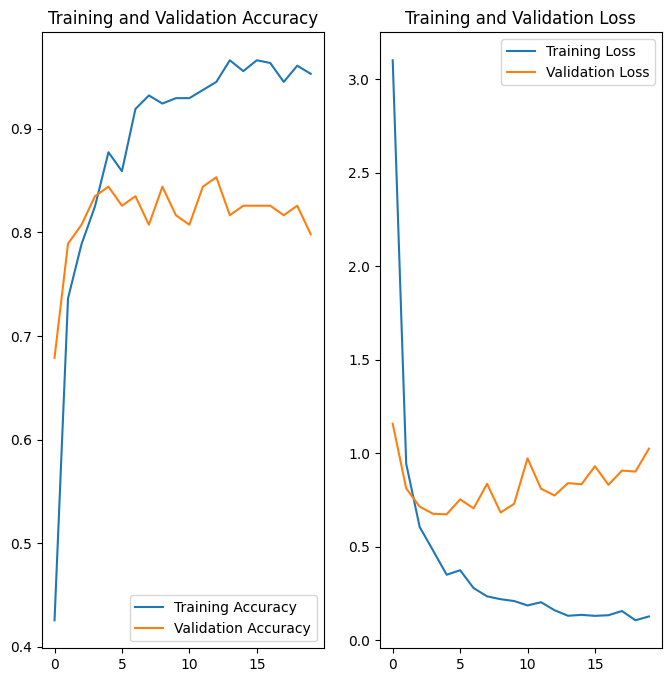

In [21]:
import matplotlib.pyplot as plt

transfer_model.evaluate(test_ds)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2025-07-12 12:23:23.715409: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Precision: 0.825
Recall (Sensitivity): 0.774
F1 Score: 0.760


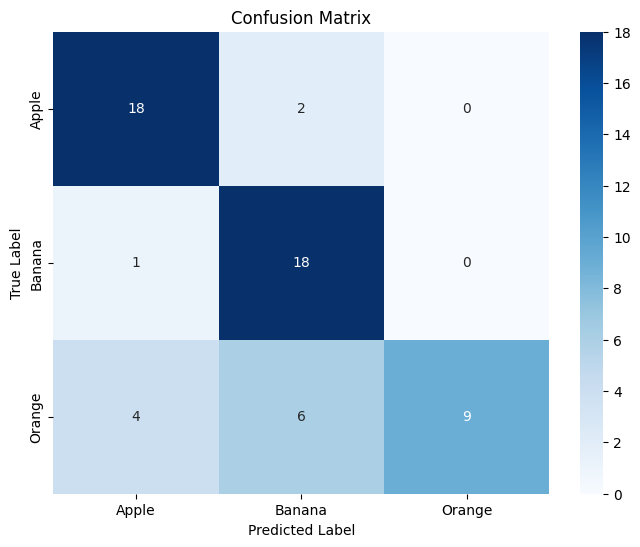

In [22]:
# Get predictions and true labels
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

y_true = []

for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

y_pred_probs = transfer_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision, recall, f1-score (macro average)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Plot confusion matrix
class_names = train_ds.class_names
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
#prediction

import tensorflow as tf
import numpy as np

# === Settings ===
model_path = "./models/customCNNWithTFLearning.keras"            # Replace with your model path
image_path = "./images/test/orange_30.jpg"        # Replace with your image path
class_names = ["Apple", "Banana", "Orange"]  # Your class labels

TLCNNModel = tf.keras.models.load_model(model_path)

# === Load & Preprocess Image ===
img = tf.keras.utils.load_img(image_path, target_size=(image_size,image_size))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)      # Add batch dimension

# === Predict ===
predictions = TLCNNModel.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence = np.max(predictions[0])

# === Output ===
print(f"Predicted: {class_names[predicted_class]} ({confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Predicted: Orange (0.81)
